# Credit Card Fraud Detection

In [1]:
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from warnings import filterwarnings
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Medhavi\Desktop\kaggle\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().values.any()

False

This indicates that our dataset has no null values.

In [4]:
df.shape

(284807, 31)

In [5]:
# Here we are taking a fraction of data from the dataset

data = df.sample(frac=0.20, random_state=1)
data.shape

(56961, 31)

In [6]:
normal_case = df[df['Class'] == 0]
fraud_case = df[df['Class'] == 1]

outlier_fraction = len(fraud_case)/len(normal_case)

print(len(normal_case))            # The number of normal cases among all cases
print(len(fraud_case))             # The number of fraud cases among all cases

284315
492


In [7]:
normal_case.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
fraud_case.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

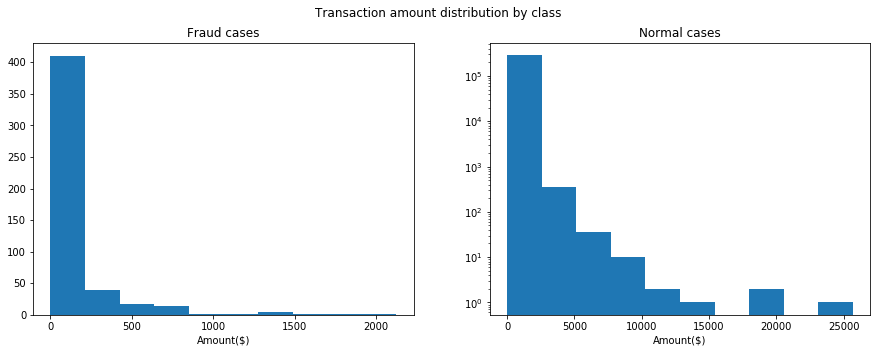

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.suptitle("Transaction amount distribution by class")
plt.xlabel('Amount($)')
plt.title('Fraud cases')
plt.hist(fraud_case.Amount)
plt.subplot(1, 2, 2)
plt.xlabel('Amount($)')
plt.title('Normal cases')
plt.hist(normal_case.Amount)
plt.yscale('log')
plt.show()

The above distribution shows that the transaction amount in fraud cases is comparatively lower that the transaction amount in normal cases.

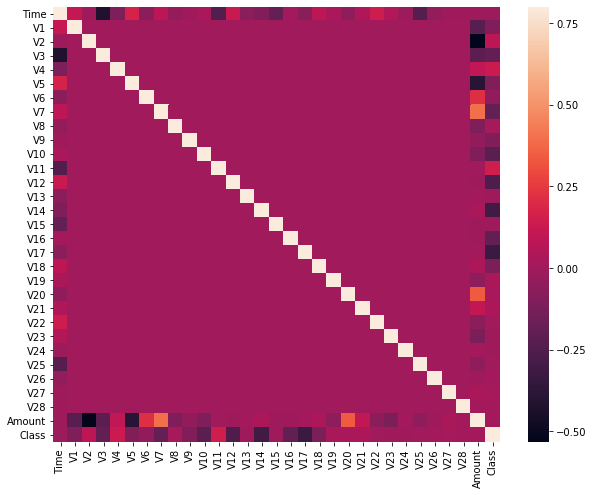

In [10]:
corr = df.corr()    # to generate correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmax=0.8)

From the heatmap, we can observe that most of the values are close to 0. Lighter color represent a strong correlation whereas darker color represents weaker coorelation.

In [11]:
X = df['Class']                             # X is used to store the target variable
Y = df.drop(['Class'], axis = 'columns')    # Y includes all columns except the class column
print(X.shape)
print(Y.shape)

(284807,)
(284807, 30)




## Algorithms used:-


#### Isolation Forest Algorithm - 

The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

#### Local Outlier Factor Algorithm - 

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

In [12]:
# defining the methods to detect outliers

classifiers = {
    
    'Isolation Forest': IsolationForest(max_samples=len(Y), contamination=outlier_fraction, random_state=1),
    
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction)
    
}

In [13]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    if clf_name == 'Isolation Forest':
        clf.fit(Y)
        y_pred = clf.predict(Y)
        score_pred = clf.decision_function(Y)
        
    else:
        y_pred = clf.fit_predict(Y)
        score_pred = clf.negative_outlier_factor_
    
    # changing y_pred values to match with the values of class column i.e. '0' for normal case & '1' for fraud case
    
    y_pred[y_pred == 1] = 0                  
    y_pred[y_pred == -1] = 1
    
    accuracy = accuracy_score(X, y_pred)          # for calculating the accuracy of the model

    print('{}:{}'.format(clf_name, accuracy))
    print(classification_report(X, y_pred))

C:\Users\Medhavi\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Medhavi\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest:0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor:0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



## Conclusion

-  Isolation Forest's accuracy of 99.77% is greater than LOF's accuracy of 99.67%.
-  On comparing precision and recall for both models, we notice that fraud detection in IsolationForest is around 35% while in LOF it is around just 5%.
-  Therefore, IsolationForest performed better Local Outlier factor algorithm.